In [1]:
import pandas as pd
import numpy as np
import plotly as py
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets
import bqplot
from bqplot import pyplot
from bqplot import Tooltip

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66527,Zimbabwe,ZWE,2021-12-01,6640440.0,3809900.0,2830540.0,NaN,28498.0,21938.0,44.00,25.24,18.76,NaN,1454.0,12896.0,0.085
66528,Zimbabwe,ZWE,2021-12-02,6682111.0,3830488.0,2851623.0,NaN,41671.0,24152.0,44.28,25.38,18.89,NaN,1600.0,13167.0,0.087
66529,Zimbabwe,ZWE,2021-12-03,6710095.0,3845246.0,2864849.0,NaN,27984.0,23681.0,44.46,25.48,18.98,NaN,1569.0,12556.0,0.083
66530,Zimbabwe,ZWE,2021-12-04,6742193.0,3866139.0,2876054.0,NaN,32098.0,25964.0,44.67,25.62,19.06,NaN,1720.0,14392.0,0.095


In [3]:
df.isnull().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     28891
people_vaccinated                      30522
people_fully_vaccinated                33483
total_boosters                         57359
daily_vaccinations_raw                 34995
daily_vaccinations                       344
total_vaccinations_per_hundred         28891
people_vaccinated_per_hundred          30522
people_fully_vaccinated_per_hundred    33483
total_boosters_per_hundred             57359
daily_vaccinations_per_million           344
daily_people_vaccinated                 1528
daily_people_vaccinated_per_hundred     1528
dtype: int64

In [4]:
df.fillna(value=0, inplace=True)
date = df.date.str.split('-', expand=True)
date

,0,1,2
0,2021,02,22
1,2021,02,23
2,2021,02,24
3,2021,02,25
4,2021,02,26
...,...,...,...
66527,2021,12,01
66528,2021,12,02
66529,2021,12,03
66530,2021,12,04


In [5]:
df['year'] = date[0]
df['month'] = date[1]
df['day'] = date[2]
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

df.date = pd.to_datetime(df.date)

df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,2021,2,22
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,23
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,24
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,25
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66527,Zimbabwe,ZWE,2021-12-01,6640440.0,3809900.0,2830540.0,0.0,28498.0,21938.0,44.00,25.24,18.76,0.0,1454.0,12896.0,0.085,2021,12,1
66528,Zimbabwe,ZWE,2021-12-02,6682111.0,3830488.0,2851623.0,0.0,41671.0,24152.0,44.28,25.38,18.89,0.0,1600.0,13167.0,0.087,2021,12,2
66529,Zimbabwe,ZWE,2021-12-03,6710095.0,3845246.0,2864849.0,0.0,27984.0,23681.0,44.46,25.48,18.98,0.0,1569.0,12556.0,0.083,2021,12,3
66530,Zimbabwe,ZWE,2021-12-04,6742193.0,3866139.0,2876054.0,0.0,32098.0,25964.0,44.67,25.62,19.06,0.0,1720.0,14392.0,0.095,2021,12,4


In [6]:
numeric_col = df[['location','total_vaccinations','people_vaccinated', 'people_fully_vaccinated','total_boosters','daily_vaccinations_raw',
                 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred'
                 ,'total_boosters_per_hundred', 'daily_vaccinations_per_million', 'daily_people_vaccinated', 
                 'daily_people_vaccinated_per_hundred']]
vac_mean = numeric_col.groupby('location').mean().round(0)
vac_sum = numeric_col.groupby('location').sum()
vac_mean.min()

total_vaccinations                     4.0
people_vaccinated                      3.0
people_fully_vaccinated                1.0
total_boosters                         0.0
daily_vaccinations_raw                 0.0
daily_vaccinations                     1.0
total_vaccinations_per_hundred         0.0
people_vaccinated_per_hundred          0.0
people_fully_vaccinated_per_hundred    0.0
total_boosters_per_hundred             0.0
daily_vaccinations_per_million         4.0
daily_people_vaccinated                0.0
daily_people_vaccinated_per_hundred    0.0
dtype: float64

In [7]:
vac_mean.max()

total_vaccinations                     2.939980e+09
people_vaccinated                      1.624427e+09
people_fully_vaccinated                1.053396e+09
total_boosters                         2.743506e+07
daily_vaccinations_raw                 2.222236e+07
daily_vaccinations                     2.198236e+07
total_vaccinations_per_hundred         1.210000e+02
people_vaccinated_per_hundred          5.800000e+01
people_fully_vaccinated_per_hundred    4.900000e+01
total_boosters_per_hundred             1.200000e+01
daily_vaccinations_per_million         3.579100e+04
daily_people_vaccinated                1.165435e+07
daily_people_vaccinated_per_hundred    2.000000e+00
dtype: float64

In [8]:
vac_sum.min()

total_vaccinations                     348.00
people_vaccinated                      235.00
people_fully_vaccinated                113.00
total_boosters                           0.00
daily_vaccinations_raw                   0.00
daily_vaccinations                      43.00
total_vaccinations_per_hundred           0.12
people_vaccinated_per_hundred            0.04
people_fully_vaccinated_per_hundred      0.05
total_boosters_per_hundred               0.00
daily_vaccinations_per_million         183.00
daily_people_vaccinated                  0.00
daily_people_vaccinated_per_hundred      0.00
dtype: float64

In [9]:
vac_sum.max()

total_vaccinations                     1.090733e+12
people_vaccinated                      6.026626e+11
people_fully_vaccinated                3.908100e+11
total_boosters                         1.017841e+10
daily_vaccinations_raw                 8.244496e+09
daily_vaccinations                     8.155456e+09
total_vaccinations_per_hundred         4.040187e+04
people_vaccinated_per_hundred          1.934490e+04
people_fully_vaccinated_per_hundred    1.690186e+04
total_boosters_per_hundred             4.154980e+03
daily_vaccinations_per_million         3.007716e+06
daily_people_vaccinated                4.323762e+09
daily_people_vaccinated_per_hundred    1.291950e+02
dtype: float64

In [10]:
def data_to_color(map_data):
    name = []
    for i in map_data:
        name.append((i['properties']['name'],i['id']))
    name = dict(name)
    color = []
    for name, idx in name.items():
        daily_vac_mean = vac_mean[vac_mean.index.str.contains(name)].total_vaccinations.values
        if len(daily_vac_mean) > 0:
            color.append((idx, daily_vac_mean[0]))
    return dict(color)

In [11]:
fig = pyplot.figure(title='Global average daily vaccination')
pyplot.scales(scales={'color':bqplot.ColorScale(scheme='RdYlBu')})
world_map = pyplot.geo(map_data='WorldMap',
             colors={'default_color':'Grey'})
map_data = world_map.map_data['objects']['subunits']['geometries']
world_map.color = data_to_color(map_data)
world_map.tooltip = Tooltip(fields=['color'], labels=['Daily average vaccinations'])
fig
pyplot.show()

C:\Users\augus\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


# Global Daily vaccination

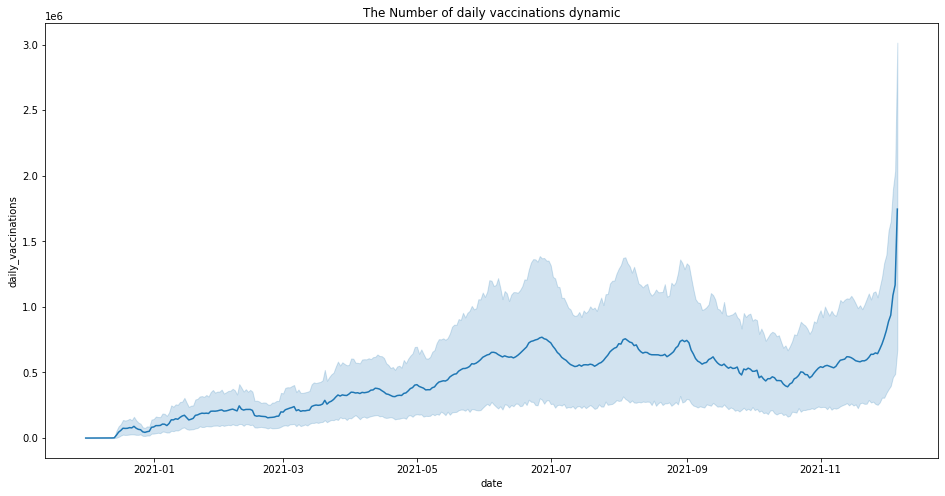

In [12]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df.date, y=df.daily_vaccinations)
plt.title('The Number of daily vaccinations dynamic')
plt.show()

In [13]:
countries = df.groupby('location')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= df.columns)
for country in countries:
    top_countries = top_countries.append(df.loc[df['location'] == country])

C:\Users\augus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


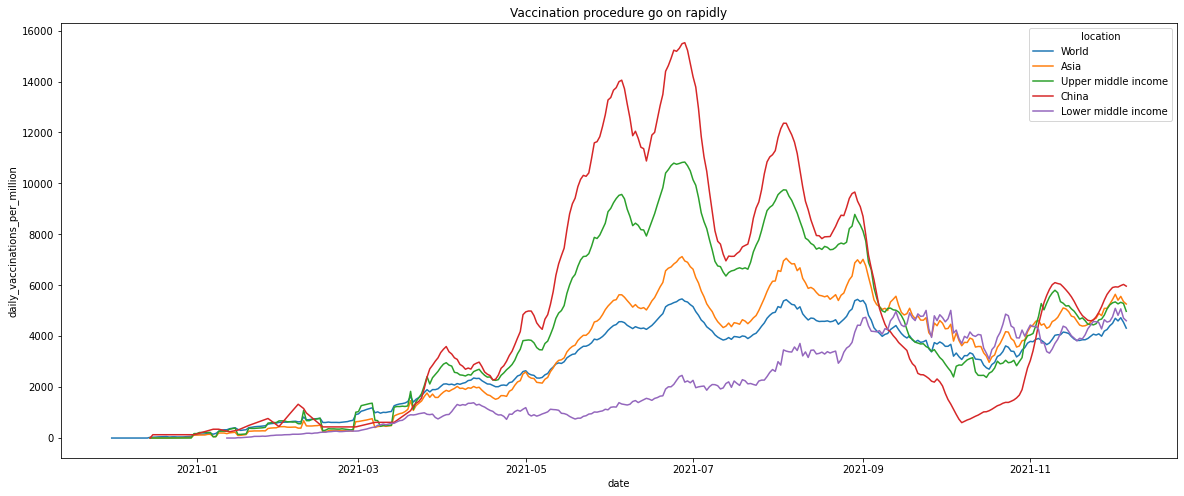

In [14]:
plt.figure(figsize=(20,8))
sns.lineplot(top_countries['date'], top_countries['daily_vaccinations_per_million'], hue= top_countries['location'], ci= False)
plt.title('Vaccination procedure go on rapidly');

In [15]:
# Daily Vaccination For each country
location = df.location.unique()

In [16]:
location

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethi

In [17]:
vaccination_subset = df.loc[((df.location == 'Zambia') & (df.people_fully_vaccinated != 0))]#["Zambia"]
vaccination_subset


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,year,month,day
66041,Zambia,ZMB,2021-05-21,129941.0,128834.0,1107.0,0.0,3650.0,4224.0,0.69,0.68,0.01,0.0,223.0,4066.0,0.021,2021,5,21
66042,Zambia,ZMB,2021-05-22,134832.0,131633.0,3199.0,0.0,4891.0,3863.0,0.71,0.70,0.02,0.0,204.0,3406.0,0.018,2021,5,22
66043,Zambia,ZMB,2021-05-23,138201.0,133134.0,5067.0,0.0,3369.0,3846.0,0.73,0.70,0.03,0.0,203.0,3122.0,0.017,2021,5,23
66045,Zambia,ZMB,2021-05-25,144085.0,138799.0,5286.0,0.0,0.0,3800.0,0.76,0.73,0.03,0.0,201.0,3044.0,0.016,2021,5,25
66046,Zambia,ZMB,2021-05-26,145198.0,139912.0,5286.0,0.0,1113.0,3570.0,0.77,0.74,0.03,0.0,189.0,2815.0,0.015,2021,5,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66231,Zambia,ZMB,2021-11-27,1062540.0,0.0,671006.0,0.0,0.0,5155.0,5.62,0.00,3.55,0.0,272.0,0.0,0.000,2021,11,27
66233,Zambia,ZMB,2021-11-29,1086607.0,0.0,691735.0,0.0,0.0,8102.0,5.74,0.00,3.66,0.0,428.0,0.0,0.000,2021,11,29
66236,Zambia,ZMB,2021-12-02,1109512.0,0.0,711422.0,0.0,0.0,7154.0,5.86,0.00,3.76,0.0,378.0,0.0,0.000,2021,12,2
66237,Zambia,ZMB,2021-12-03,1134766.0,0.0,731770.0,0.0,25254.0,10540.0,6.00,0.00,3.87,0.0,557.0,0.0,0.000,2021,12,3


In [18]:
@ipywidgets.interact(location = df.location.unique())
def Daily_Vaccination_Plot(location):
    vaccination_subset = df.loc[((df.location == location) & (df.people_fully_vaccinated != 0))]
    
    fig,ax = plt.subplots(figsize=(10,5))
    
    ax.plot(vaccination_subset["date"],vaccination_subset["people_fully_vaccinated"])
    ax.set_xlabel("Date")
    ax.set_ylabel("Fully vaccinated people")
    ax.set_title("The number of fully vaccinated in " + str(location) )
    plt.show()

interactive(children=(Dropdown(description='location', options=('Afghanistan', 'Africa', 'Albania', 'Algeria',…

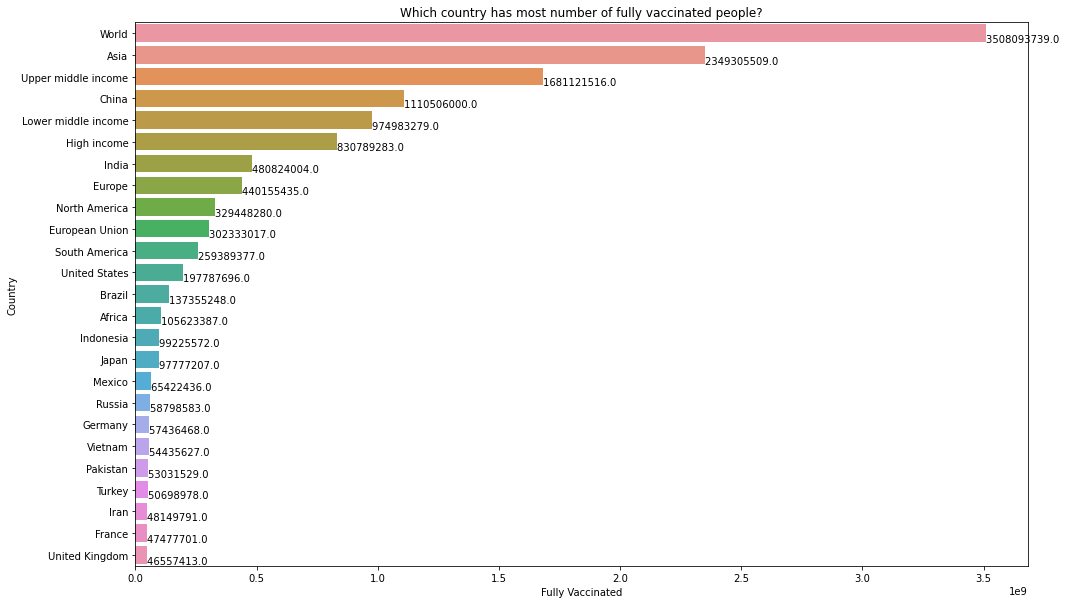

In [19]:
fully_vaccinated = df.groupby("location")["people_fully_vaccinated"].max().sort_values(ascending= False).head(25)

plt.figure(figsize=(16,10))
ax = sns.barplot(x=fully_vaccinated, y=fully_vaccinated.index)
plt.xlabel("Fully Vaccinated")
plt.ylabel("Country");
plt.title('Which country has most number of fully vaccinated people?');

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} '.format(width))

# Percentage of Fully Vaccinated Population in Top15 Countries

In [20]:
population_country = df.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending=False).reset_index()
filter_country = population_country.loc[population_country["people_fully_vaccinated_per_hundred"] <= 100].head(15)
filter_country

,location,people_fully_vaccinated_per_hundred
1,Pitcairn,100.00
2,Singapore,91.91
3,Portugal,88.56
4,United Arab Emirates,88.40
5,Cayman Islands,84.49
6,Chile,84.44
7,Malta,83.89
8,Cuba,82.06
9,Iceland,81.96
10,South Korea,80.71


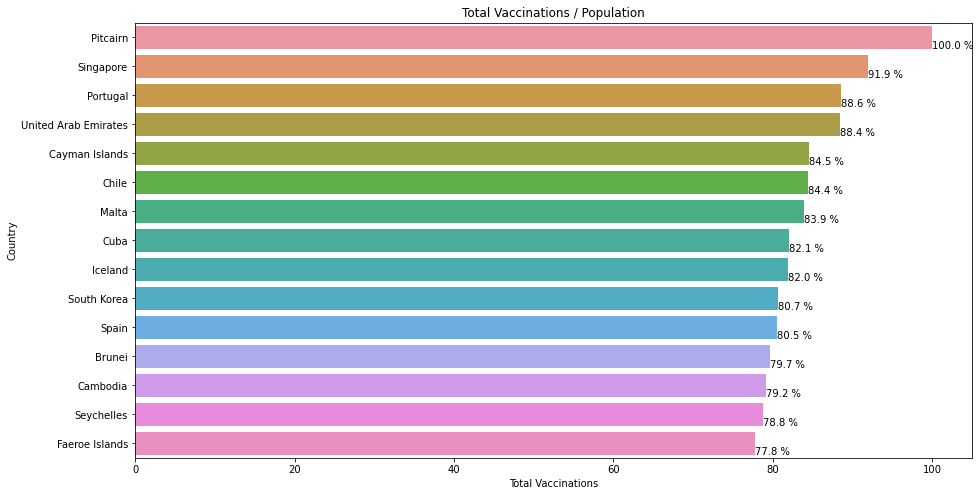

In [21]:
plt.figure(figsize= (15, 8))

ax = sns.barplot(x=filter_country.people_fully_vaccinated_per_hundred, y=filter_country.location)
plt.title('Total Vaccinations / Population')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} %'.format(width))

# Daily Vaccinated in Bangladesh

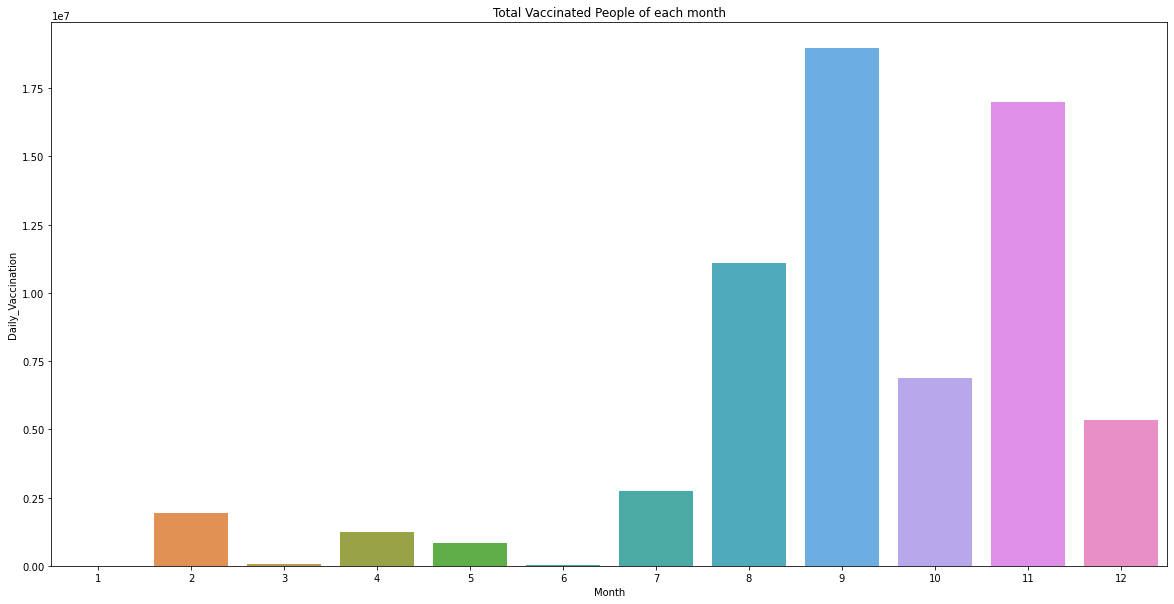

In [22]:
bangladesh_df = df[df['location'] == 'Bangladesh'].groupby("month").sum()

plt.figure(figsize=(20,10))
sns.barplot(x=bangladesh_df.index, y=bangladesh_df.daily_vaccinations_raw)
plt.xlabel("Month")
plt.ylabel("Daily_Vaccination")
plt.title('Total Vaccinated People of each month');

# 

In [23]:
month_dic = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10,
        'November':11, 'December' :12}
@ipywidgets.interact(month = month_dic.keys())
def Bangladesh_Vaccinated_Plot(month):
    month_number = month_dic[month]
    Bangladesh = df.loc[(df.location == "Bangladesh") & (df.month == month_number)]
    fig,ax = plt.subplots(figsize=(15,8))
    ax = sns.barplot(x=Bangladesh.day, y=Bangladesh.daily_vaccinations_raw)
    ax.set_title("Daily Vaccination of " + month)

interactive(children=(Dropdown(description='month', options=('January', 'February', 'March', 'April', 'May', '…

# USA State vaccination Rate

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv")
df

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21407,2021-12-03,Wyoming,640504.0,822325.0,312448.0,45.82,110.67,265193.0,53.99,142.08,2508.0,1977.0,3416.0,0.779
21408,2021-12-04,Wyoming,643976.0,822045.0,313280.0,45.96,111.27,265972.0,54.13,142.04,3472.0,2270.0,3922.0,0.783
21409,2021-12-05,Wyoming,644277.0,821905.0,313458.0,45.97,111.32,266049.0,54.16,142.01,301.0,2111.0,3647.0,0.784
21410,2021-12-06,Wyoming,644324.0,820505.0,313534.0,45.97,111.33,266071.0,54.17,141.77,47.0,1915.0,3309.0,0.785


In [25]:
df.fillna(value=0, inplace=True)
date = df.date.str.split('-', expand=True)
date

,0,1,2
0,2021,01,12
1,2021,01,13
2,2021,01,14
3,2021,01,15
4,2021,01,16
...,...,...,...
21407,2021,12,03
21408,2021,12,04
21409,2021,12,05
21410,2021,12,06


In [26]:
df['year'] = date[0]
df['month'] = date[1]
df['day'] = date[2]
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

df.date = pd.to_datetime(df.date)

df

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,year,month,day
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,0.0,0.0,0.0,0.207,2021,1,12
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,2021,1,13
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,0.00,1.88,0.0,1.64,8.88,8260.0,7083.0,1445.0,0.212,2021,1,14
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,2021,1,15
4,2021-01-16,Alabama,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,7498.0,1529.0,0.000,2021,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21407,2021-12-03,Wyoming,640504.0,822325.0,312448.0,45.82,110.67,265193.0,53.99,142.08,2508.0,1977.0,3416.0,0.779,2021,12,3
21408,2021-12-04,Wyoming,643976.0,822045.0,313280.0,45.96,111.27,265972.0,54.13,142.04,3472.0,2270.0,3922.0,0.783,2021,12,4
21409,2021-12-05,Wyoming,644277.0,821905.0,313458.0,45.97,111.32,266049.0,54.16,142.01,301.0,2111.0,3647.0,0.784,2021,12,5
21410,2021-12-06,Wyoming,644324.0,820505.0,313534.0,45.97,111.33,266071.0,54.17,141.77,47.0,1915.0,3309.0,0.785,2021,12,6


In [27]:
urban = pd.read_excel('data/PctUrbanRural_State.xls')
urban = urban[['STATENAME','POPPCT_URBAN']]
urban

,STATENAME,POPPCT_URBAN
0,Alabama,59.04
1,Alaska,66.02
2,Arizona,89.81
3,Arkansas,56.16
4,California,94.95
5,Colorado,86.15
6,Connecticut,87.99
7,Delaware,83.30
8,District of Columbia,100.00
9,Florida,91.16


In [29]:
fully = df.groupby('location').max().reset_index()
fully

,location,date,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,year,month,day
0,Alabama,2021-12-07,5358521.0,7902810.0,2804132.0,46.58,109.29,2283759.0,57.19,161.18,111481.0,33381.0,6808.0,0.752,2021,12,31
1,Alaska,2021-12-07,979906.0,1291135.0,465480.0,55.02,133.95,402529.0,63.63,176.49,30765.0,9046.0,12366.0,0.817,2021,12,31
2,American Samoa,2021-12-07,71187.0,78710.0,37880.0,66.67,150.21,31594.0,79.93,166.08,2715.0,604.0,10846.0,0.987,2021,12,31
3,Arizona,2021-12-07,9840702.0,11948160.0,4741745.0,55.38,135.20,4030601.0,65.15,164.15,271958.0,63074.0,8666.0,0.892,2021,12,31
4,Arkansas,2021-12-07,3598844.0,4879700.0,1843602.0,49.84,119.25,1504165.0,61.09,161.70,61459.0,53975.0,17886.0,0.812,2021,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Virginia,2021-12-07,13480440.0,15846355.0,6529116.0,66.06,157.93,5638663.0,76.49,185.65,141699.0,101058.0,11840.0,0.899,2021,12,31
61,Washington,2021-12-07,11700091.0,14265985.0,5606186.0,66.06,153.65,5030544.0,73.62,187.34,152009.0,77843.0,10222.0,0.927,2021,12,31
62,West Virginia,2021-12-07,2136682.0,3418845.0,1242899.0,49.16,119.22,880942.0,69.35,190.77,435476.0,63696.0,35542.0,0.977,2021,12,31
63,Wisconsin,2021-12-07,8430572.0,9458955.0,3869007.0,60.28,144.79,3509884.0,66.45,162.46,127068.0,66817.0,11476.0,0.977,2021,12,31


In [30]:
fully = fully[fully['location'].isin(urban.STATENAME)]
urban = urban.drop(32)

In [31]:
state = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN',
         'MS','MO','MT','NE','NV','NH','NJ','NM','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VA','VI','WA',
         'WV','WI','WY']

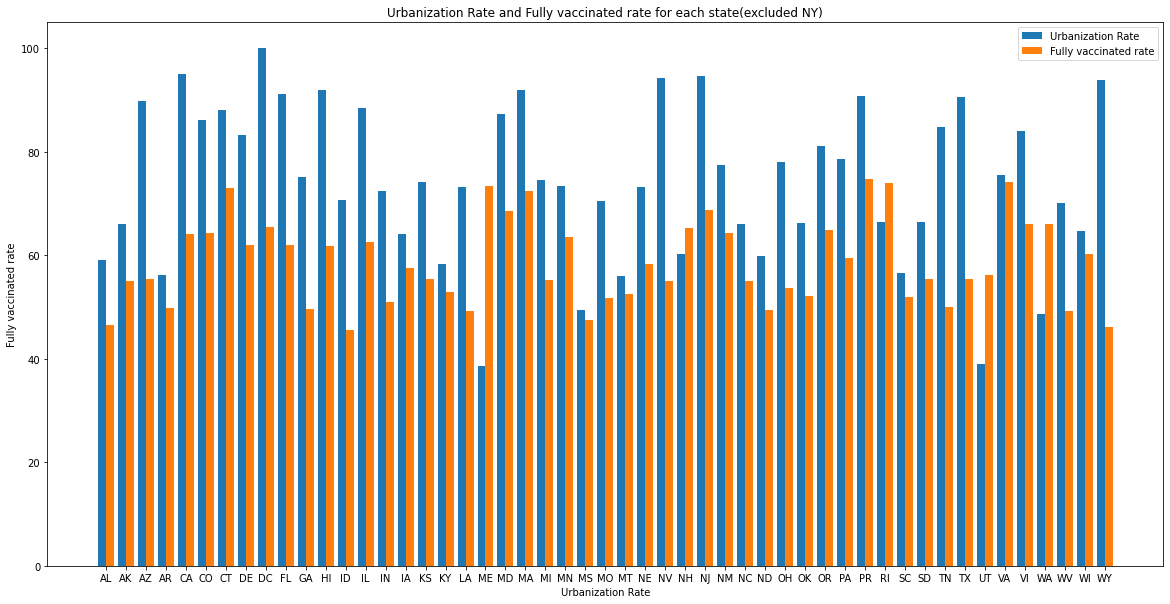

In [32]:
X = state
X_axis = np.arange(len(X))
plt.figure(figsize=(20,10))  
plt.bar(X_axis - 0.2, list(urban.POPPCT_URBAN), 0.4, label = "Urbanization Rate")
plt.bar(X_axis + 0.2, list(fully.people_fully_vaccinated_per_hundred), 0.4, label = "Fully vaccinated rate")
plt.xticks(X_axis, X)
plt.xlabel("Urbanization Rate")
plt.ylabel("Fully vaccinated rate")
plt.title("Urbanization Rate and Fully vaccinated rate for each state(excluded NY)")
plt.legend()
plt.show()